In [18]:
import pandas as pd
import numpy as np
import os
import wrangle
import explore
import lupe_wrangle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = wrangle.get_survey_data("survey.csv")
df.head(3)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN


In [20]:
df.columns.tolist()

['Timestamp',
 'Age',
 'Gender',
 'Country',
 'state',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'comments']

----------------------------------------------------
DataFrame Head
             Timestamp  Age  Gender        Country state self_employed  \
0  2014-08-27 11:29:31   37  Female  United States    IL           NaN   
1  2014-08-27 11:29:37   44       M  United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male         Canada   NaN           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interv

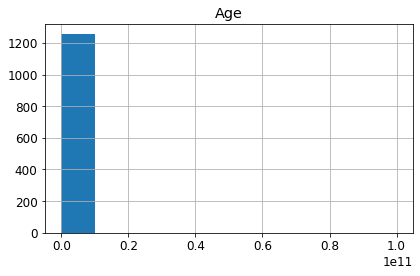

In [21]:
# Using summarize function to see head of dataframe, datatypes, amount of null values, stats, and value_counts
wrangle.summarize(df)

In [22]:
# Data preparation

In [23]:
# initial prep for object data
strings_df = wrangle.prep_the_strings(df)
strings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  957 non-null    datetime64[ns]
 1   age                        957 non-null    int64         
 2   gender                     957 non-null    object        
 3   country                    957 non-null    object        
 4   self_employed              957 non-null    object        
 5   family_history             957 non-null    object        
 6   treatment                  957 non-null    object        
 7   work_interfere             957 non-null    object        
 8   no_employees               957 non-null    object        
 9   remote_work                957 non-null    object        
 10  tech_company               957 non-null    object        
 11  benefits                   957 non-null    object        
 12  care_op

In [24]:
# initial prep for encoding objects into integers
encoded_df = wrangle.prep_encode(strings_df)
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  957 non-null    datetime64[ns]
 1   age                        957 non-null    int64         
 2   gender                     957 non-null    int64         
 3   country                    957 non-null    object        
 4   self_employed              957 non-null    int64         
 5   family_history             957 non-null    int64         
 6   treatment                  957 non-null    int64         
 7   work_interfere             957 non-null    int64         
 8   company_size               957 non-null    int64         
 9   remote_work                957 non-null    int64         
 10  tech_company               957 non-null    int64         
 11  benefits                   957 non-null    int64         
 12  care_op

In [25]:
# Explore

In [26]:
# univariate

In [27]:
# first let's split the data...

# encoded data
encoded_train, encoded_validate, encoded_test = explore.three_split(encoded_df, 'work_interfere')

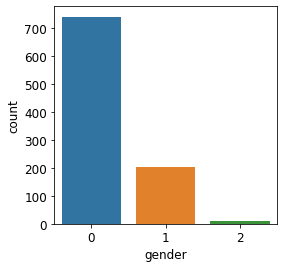

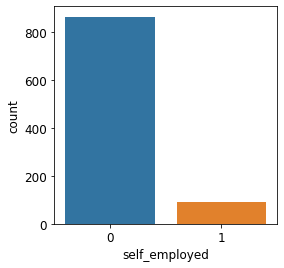

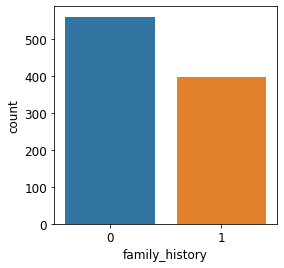

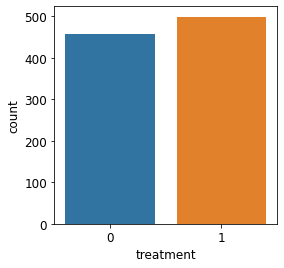

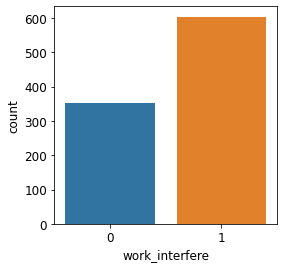

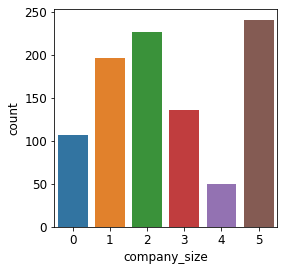

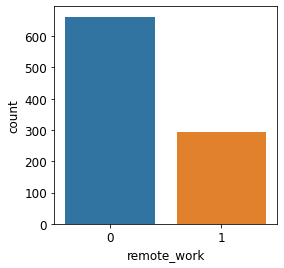

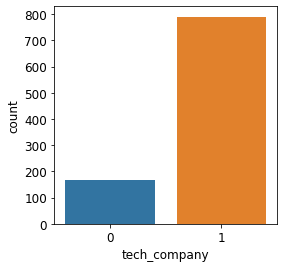

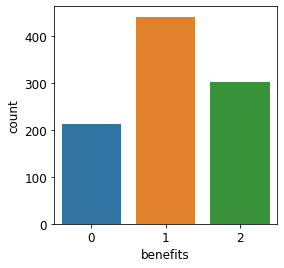

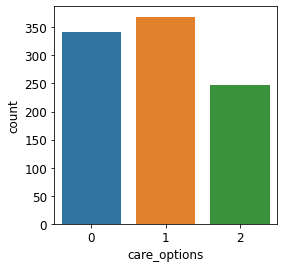

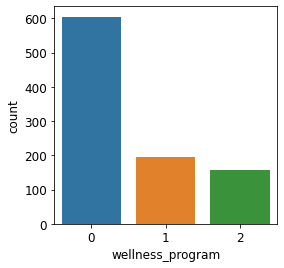

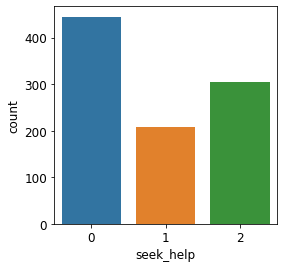

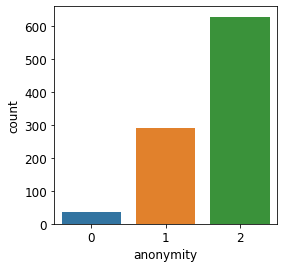

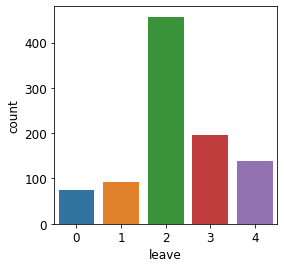

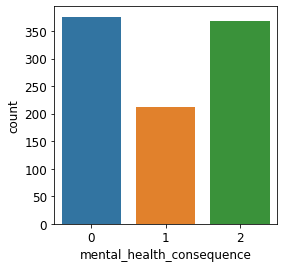

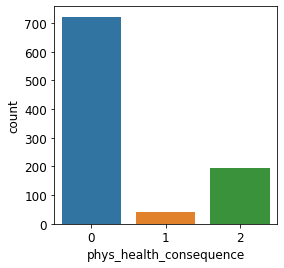

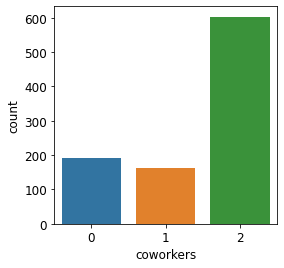

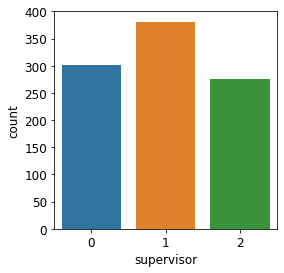

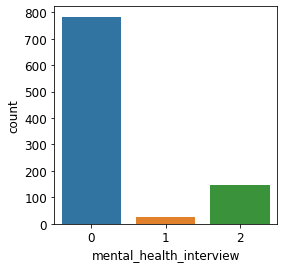

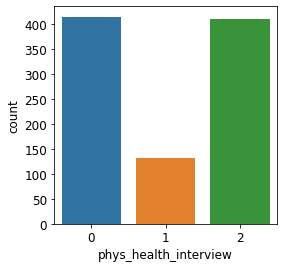

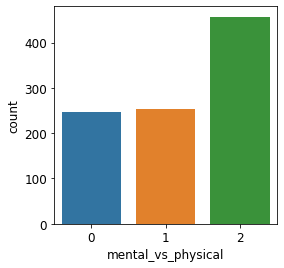

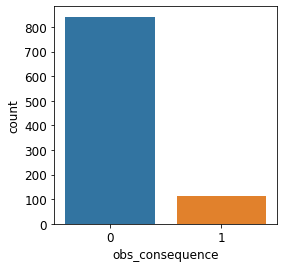

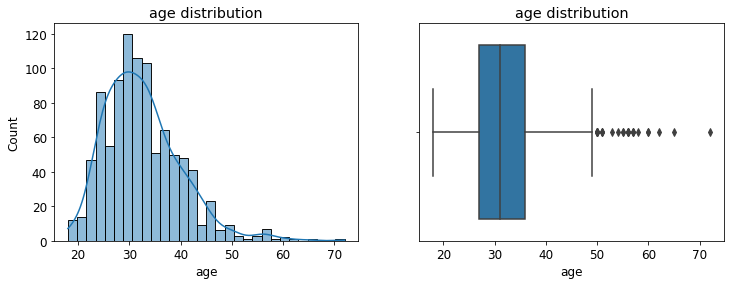

In [28]:
# countplots of categorical variables
# histograms and bosplots of continuous variables
explore.mental_health_univariate(encoded_df)

#### Univariate - Key Findings, Takeaways, and Next Steps:
- gender is very unbalanced, with approx 75% female, 25% male, and less than 1% other.
- self_employed is also very unbalanced, with only 10% self-employed.
- family_history is 40% no history, 60% history. Interesting to see so many showing a history of mental-illness...(could this be a potential driver???).
- treatment is almost evenly split and at first glance appears to not be a driver.
- work_interfere our target variable is split 60-40, will need to explore over/under-sampling methods to improve model accuracy.
- company_size has multiple peaks and valleys. It would be nice if the data wasn't already binned, so we could possibly bin differently. Also, clustering might play a role in dealing with company size. It appears there will be a relationship with our target, but what it is, is currently unclear.
- remote_work is roughly 70-30, with most people working in office. Becasue this data is pre-covid, it would be really nice to gather additional data during/post-covid to see what changes have occurred.
- tech_company represents 80% of our observations, with approx 20% not working in tech. Unclear at this time if we have enough data to make a good comparison between the two groups.
- benefits is roughly normally distributed with about half of all observations receiving benefits, one-third not receiving any, and one-fifth unsure if they are available. Really interested to learn more about the 'unsure' group. How do they not know? Are they going to stand out compared to the other two groups?
- care_options are almost uniform in distribution. 'Yes' and 'No' each receive a little over one-third of all responses, and 'Don't know' receives just under one-third. Again, we are very interested in the 'Don't know' group. Does it not matter if care is available because they do not have mental health issues? Or, is this a possible sign of a group not receiving preventative measures that could have a potentially large impact?
- wellness_program is normally distributed with 60% having a wellness program, and 20% each either not having one, or unsure. Would love to see how this relates to tech vs non-tech jobs, and again, if 'Don't know' is a driver, or just noise.
- seek_help is roughly normally distributed with 40% receiving help/resources from their company, and 30% not receiving any, and 20% unsure.
- anonymity shows most believe they would be able to keep their issues private if they received helped/seeked treatment for a mental issue. Less than 5% felt they could not stay anonymous.
- leave is roughly normally distributed, however most responses are unsure how difficult it would be to take leave due to a mental health issue.
- mental_health_consequence is skewed to the right, with 40% showing no consequences, 30% fearing consequences, and 20% unsure.
- phys_health_consequence shows a stark contrast to mental...75% have no fear, 20% worry about consequences, and 5% are unsure. We are really interested to see what leads to these differences.
- coworkers are roughly normally distributed with 60% feeling comfortable speaking with coworkers, and 20% uncomfortable and 20% unsure.
- supervisor shows another stark contrast where 30% are uncomortable, 40% comfortable, and 30% unsure.
- mental_health_interview shows that the overwhelming majority do not feel comfortable bringing up mental health issues in an interview.
- phys_health_interview shows that roughly half as many people would be afraid to bring up a physical health issue as a mental one.
- mental_vs_physical is roughly normally distributed, with most (40%) feeling like their employer takes mental health as seriously as physical health. This is really interesting considering the other responses. (If your boss takes mental health as seriously as pysical health, why are you less likely to bring up a mental issue?)
- obs_consequence shows 90% of observations have not heard of any consequences from coworkers sharing mental health issues.
- age is roughly normally distributed around a mean of 32, but has a tail on the upper end. Will be interested interesting to see if we need to bin this data, and how it relates to other variables.

#### Next Steps: Definitely want to see if the 'unsure' groups drive 'work_interfere' or if they are just noise. We will also need to look into over/under-sampling methods to normalize our data a little more, potentially.

In [29]:
# Bivariate

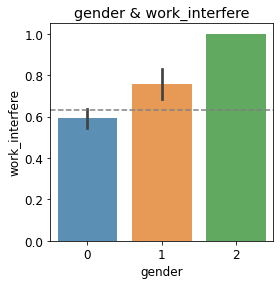


_____________________



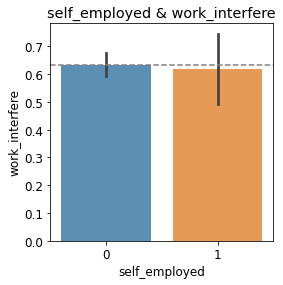


_____________________



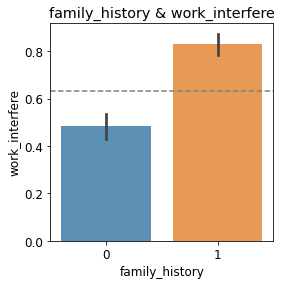


_____________________



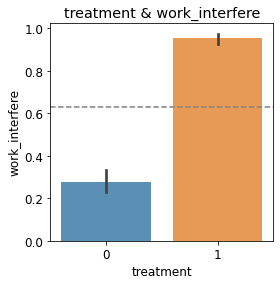


_____________________



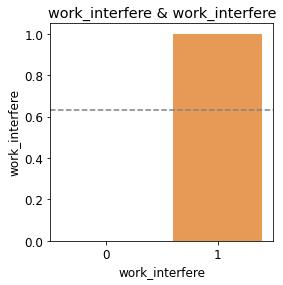


_____________________



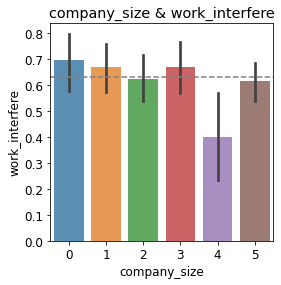


_____________________



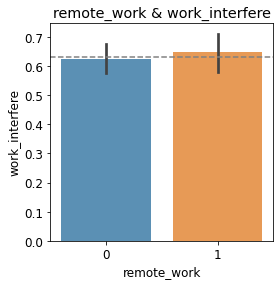


_____________________



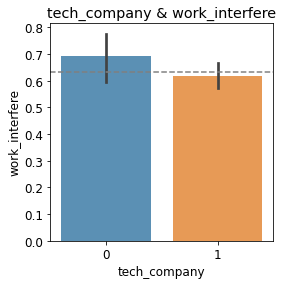


_____________________



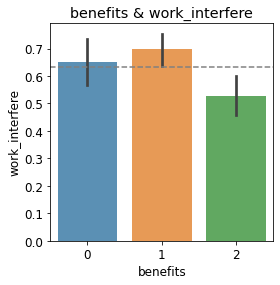


_____________________



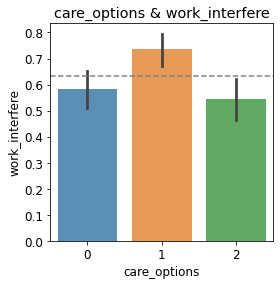


_____________________



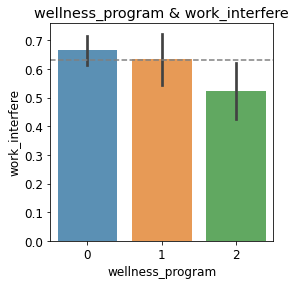


_____________________



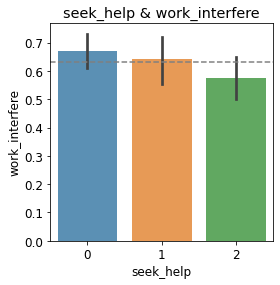


_____________________



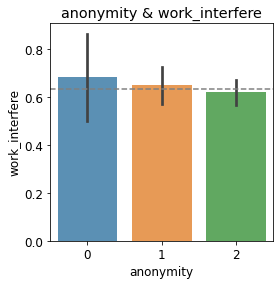


_____________________



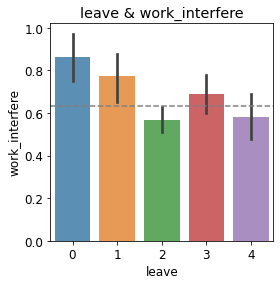


_____________________



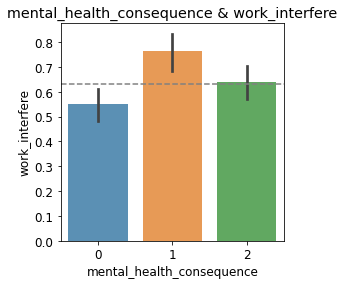


_____________________



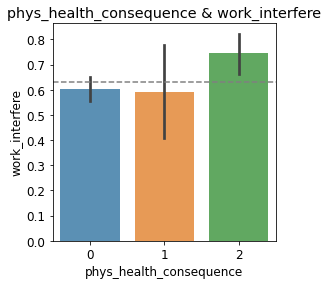


_____________________



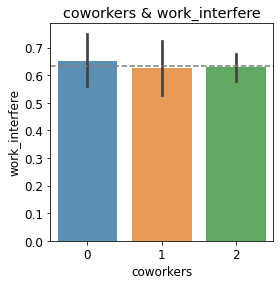


_____________________



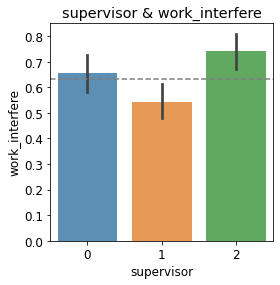


_____________________



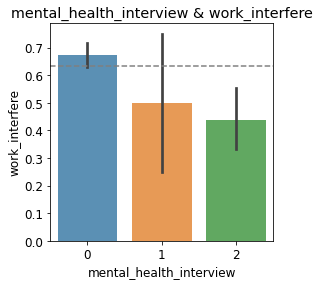


_____________________



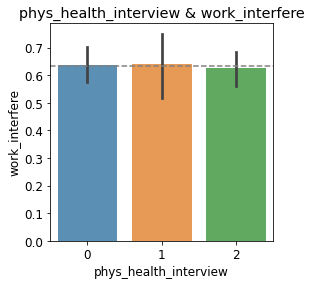


_____________________



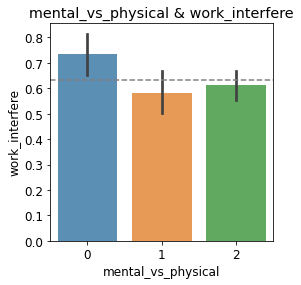


_____________________



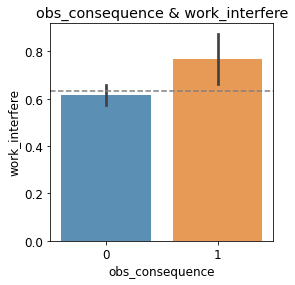


_____________________

age


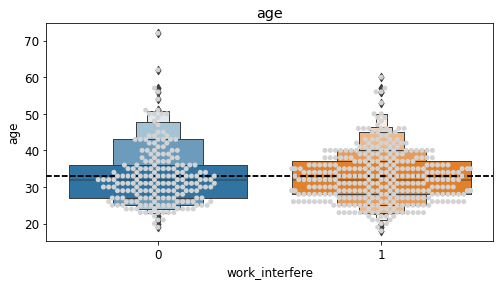

                count       mean       std   min   25%   50%   75%   max
work_interfere                                                          
0               197.0  33.025381  8.191233  19.0  27.0  32.0  36.0  72.0
1               338.0  32.801775  7.049574  18.0  28.0  32.0  37.0  60.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=32599.5, pvalue=0.6874668645912754)

____________________

                     variable    chi2  p-value  degrees of freedom
0              family_history   65.94   0.0000                 1.0
1                   treatment  258.60   0.0000                 1.0
2              work_interfere  530.71   0.0000                 1.0
3     mental_health_interview   18.51   0.0001                 2.0
4                care_options   16.16   0.0003                 2.0
5                  supervisor   15.60   0.0004                 2.0
6   mental_health_consequence   15.41   0.0005                 2.0
7                       leave   19.49   0.0006               

In [30]:
encoded_bi_metrics = explore.mental_health_bivariate(encoded_train, 'work_interfere')

In [31]:
# Bivariate - key findings, takeaways, and next steps

#### 2nd Iteration
The second iteration will be performed on the one-hot encoded data, before deciding what other feature engineering we would like to perform before the third iteration of data exploration.

In [32]:
# one-hot encode the data
hot_df = explore.one_hot(encoded_df)

In [33]:
# split the one-hot encoded data
hot_train, hot_validate, hot_test = explore.three_split(hot_df, 'work_interfere')

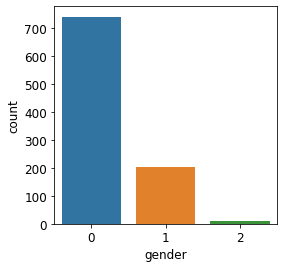

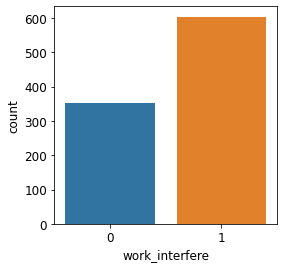

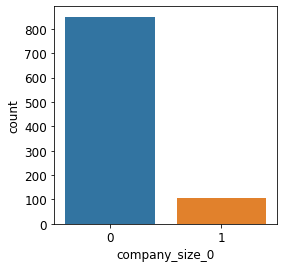

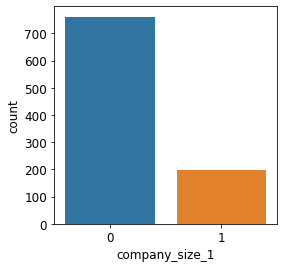

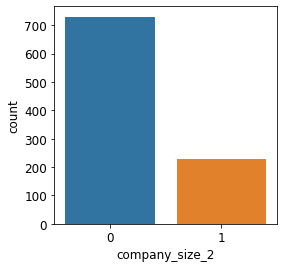

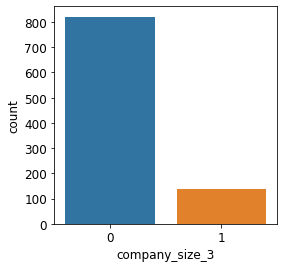

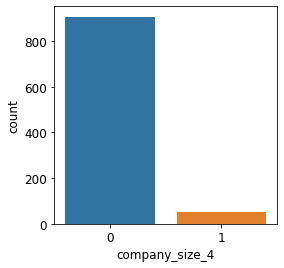

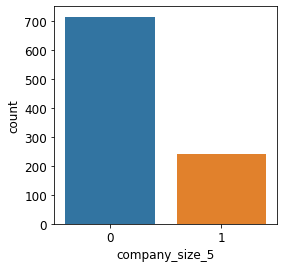

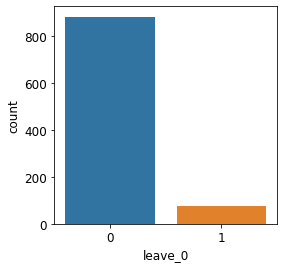

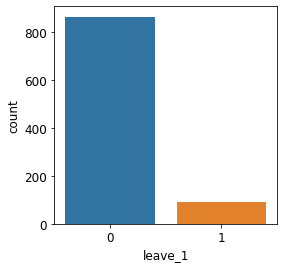

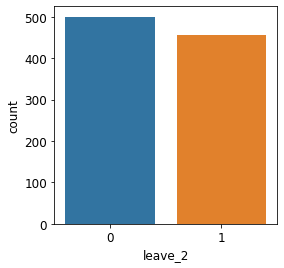

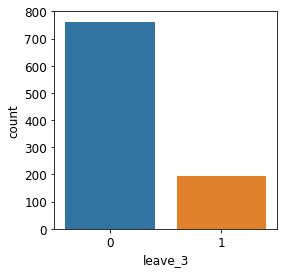

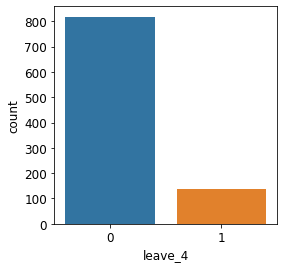

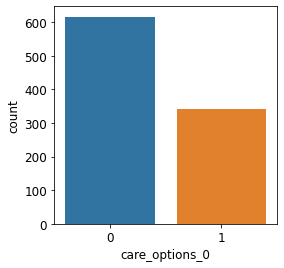

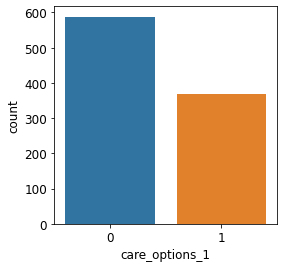

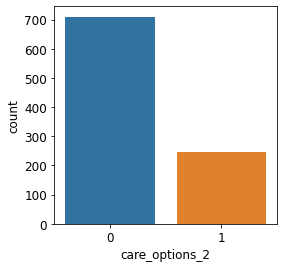

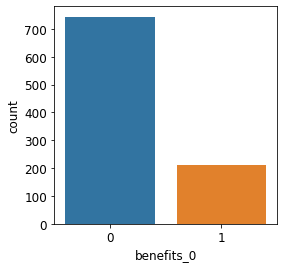

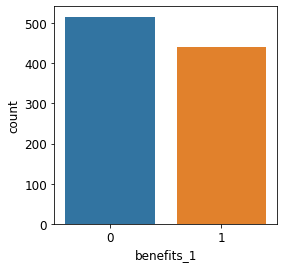

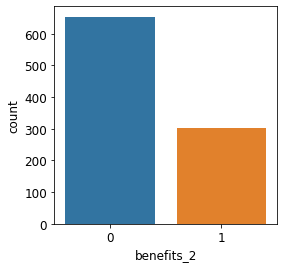

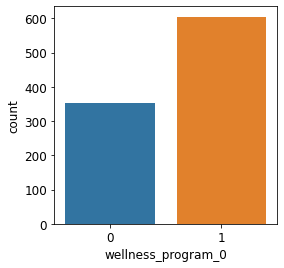

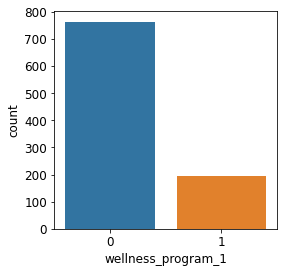

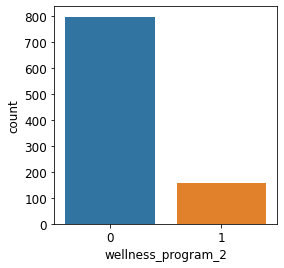

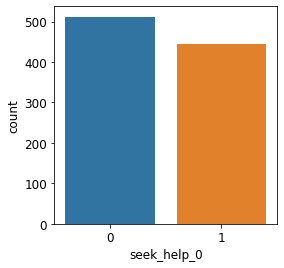

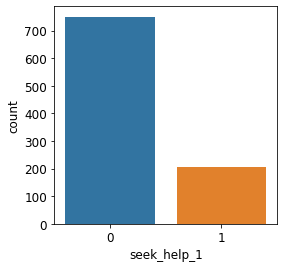

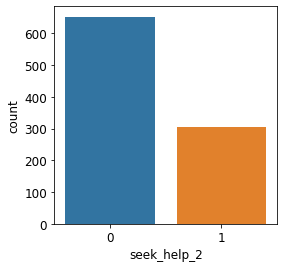

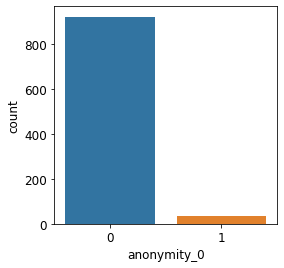

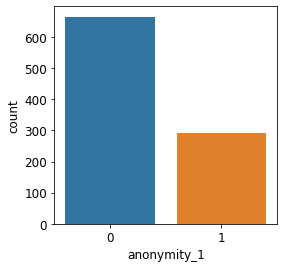

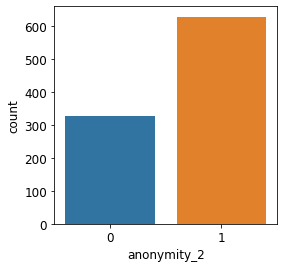

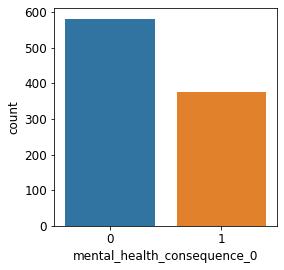

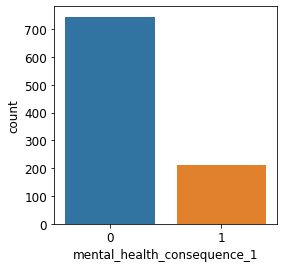

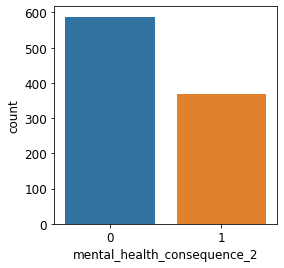

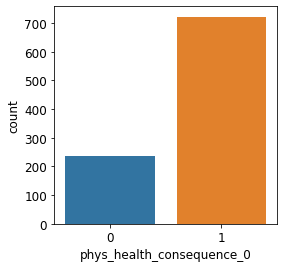

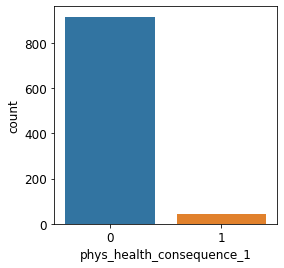

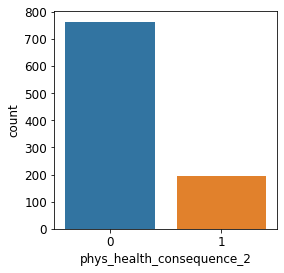

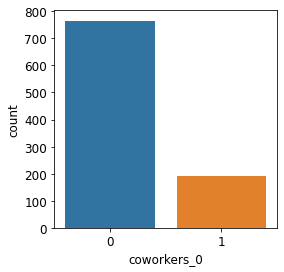

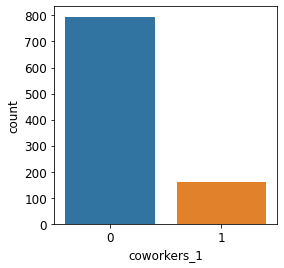

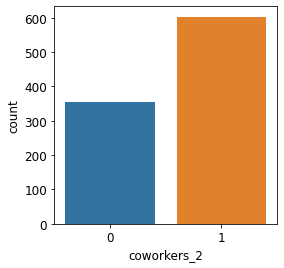

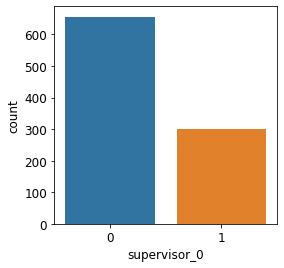

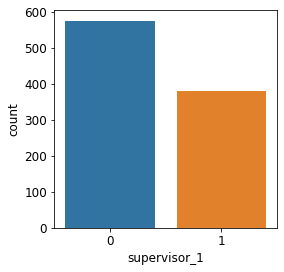

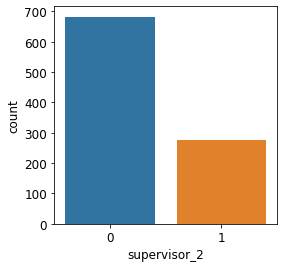

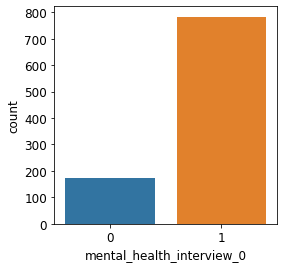

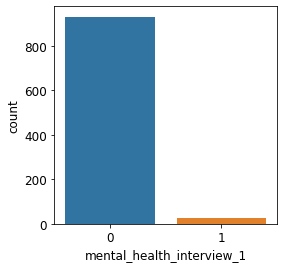

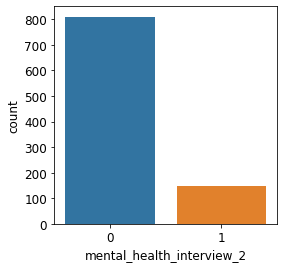

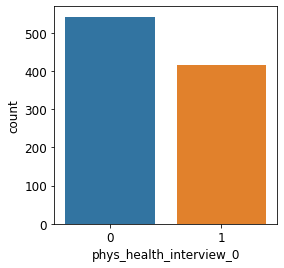

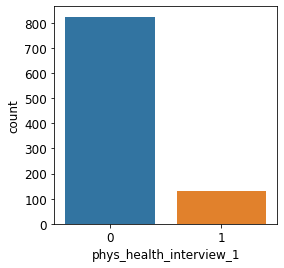

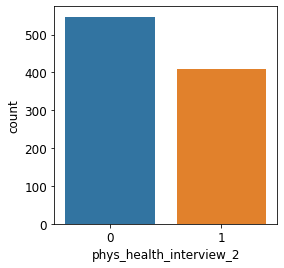

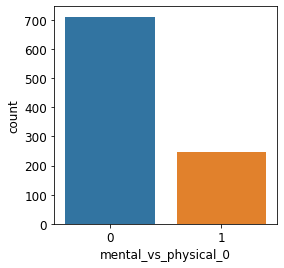

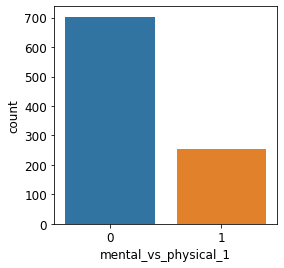

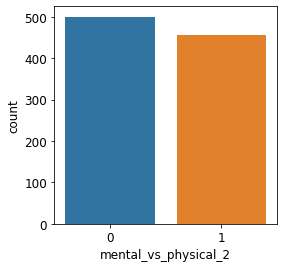

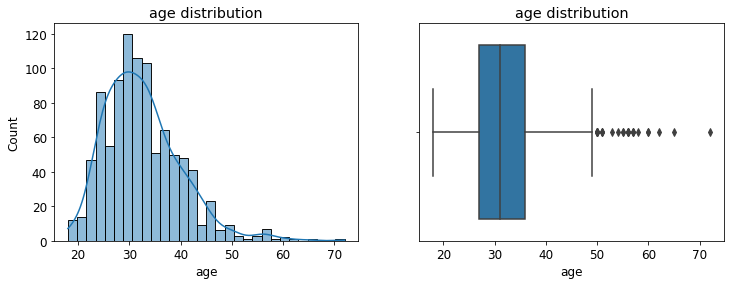

In [34]:
# univariate exploration on one-hot encoded data

explore.mental_health_univariate(hot_df)

#### Bivariate

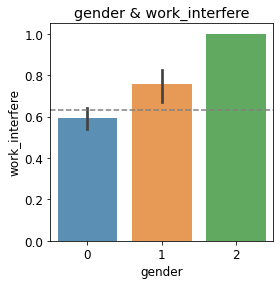


_____________________



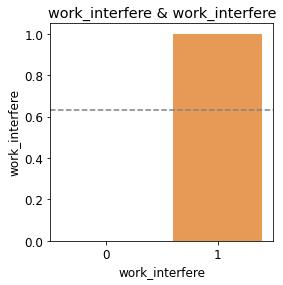


_____________________



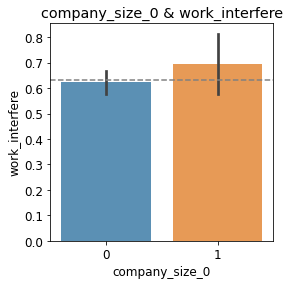


_____________________



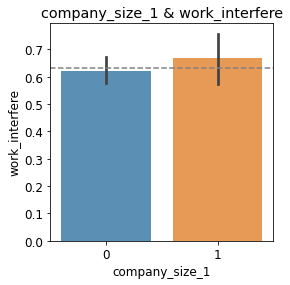


_____________________



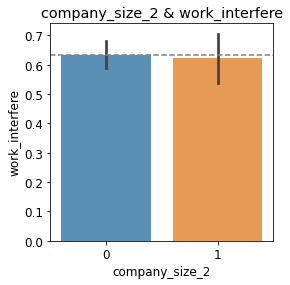


_____________________



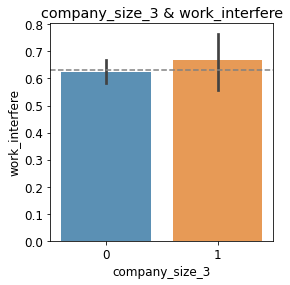


_____________________



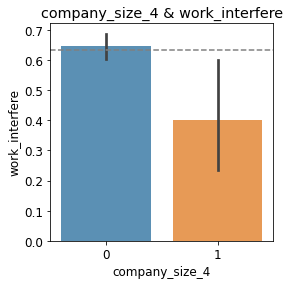


_____________________



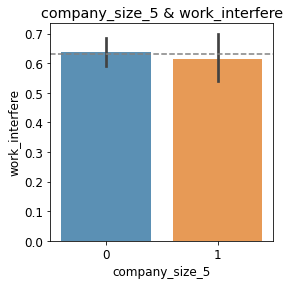


_____________________



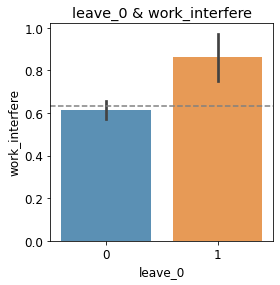


_____________________



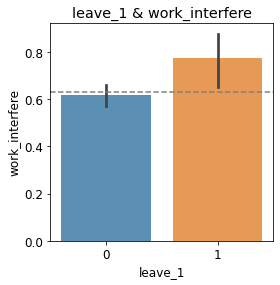


_____________________



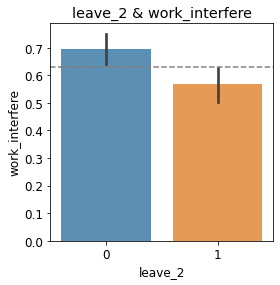


_____________________



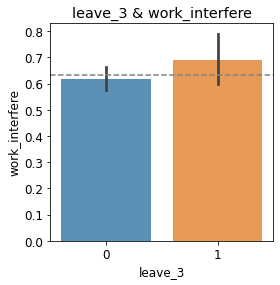


_____________________



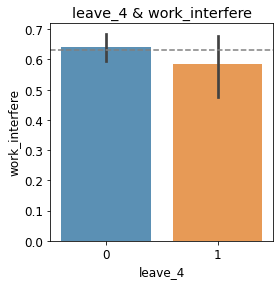


_____________________



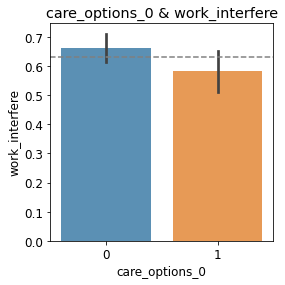


_____________________



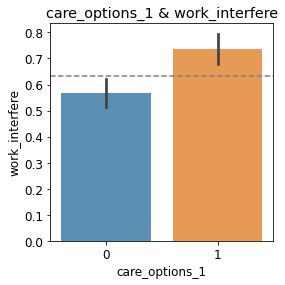


_____________________



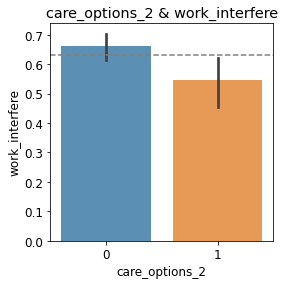


_____________________



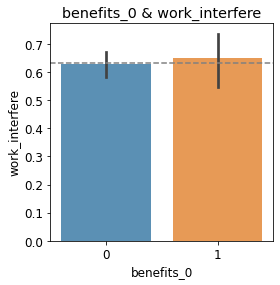


_____________________



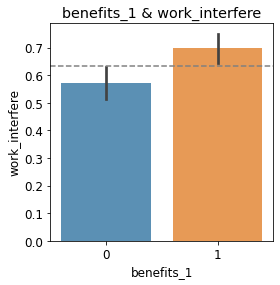


_____________________



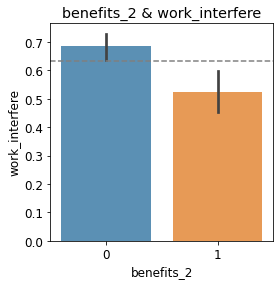


_____________________



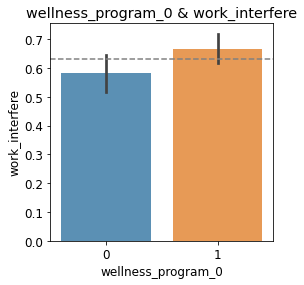


_____________________



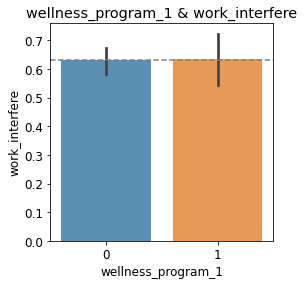


_____________________



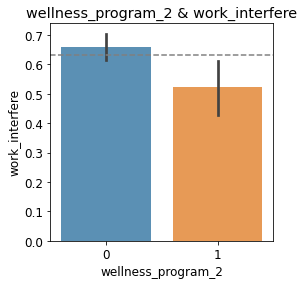


_____________________



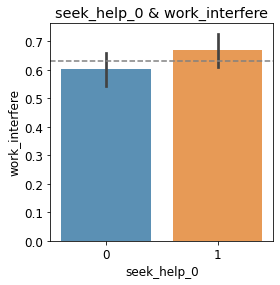


_____________________



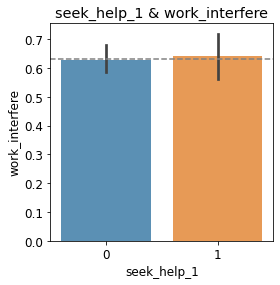


_____________________



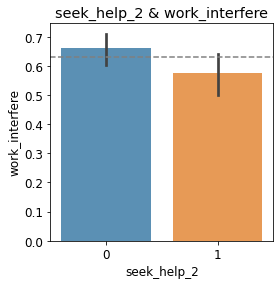


_____________________



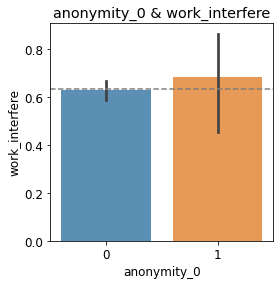


_____________________



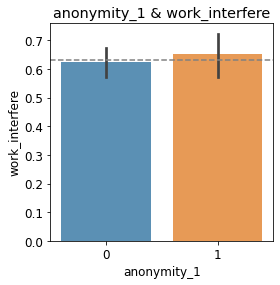


_____________________



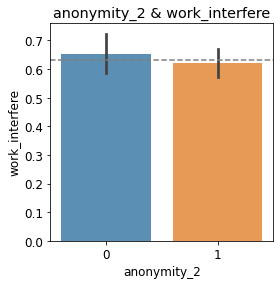


_____________________



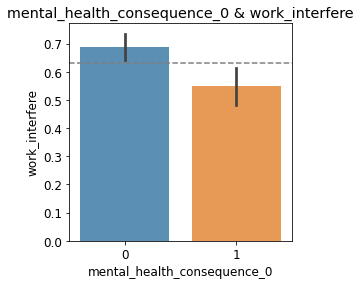


_____________________



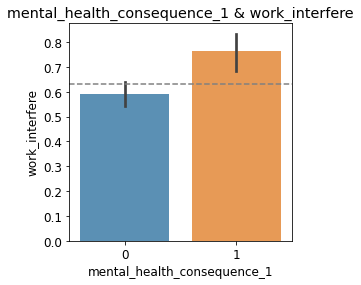


_____________________



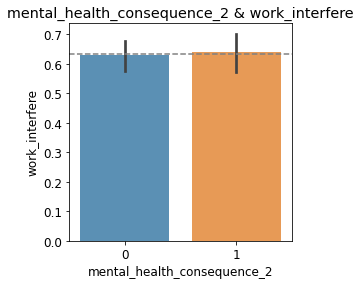


_____________________



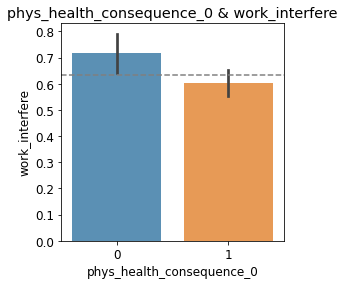


_____________________



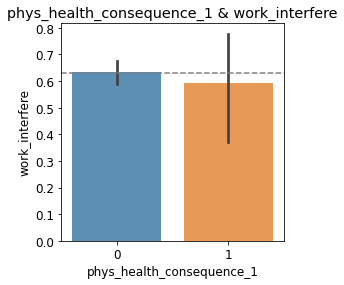


_____________________



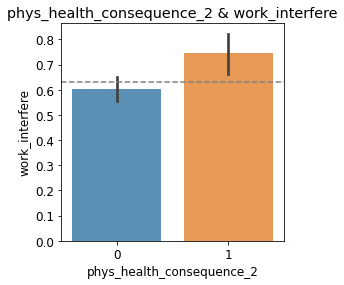


_____________________



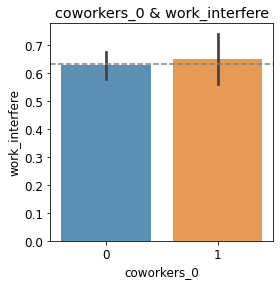


_____________________



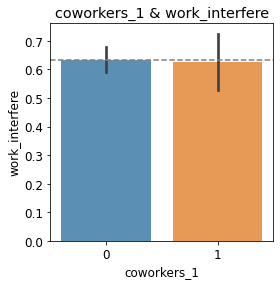


_____________________



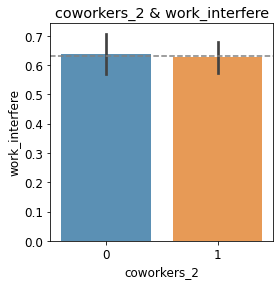


_____________________



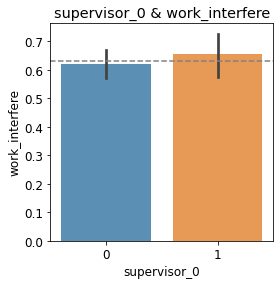


_____________________



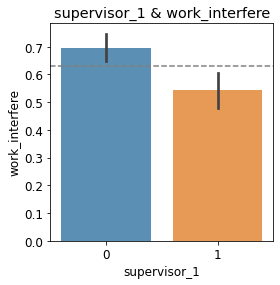


_____________________



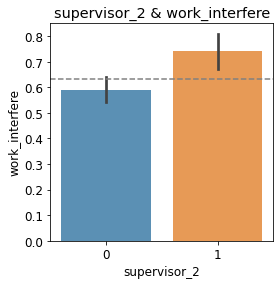


_____________________



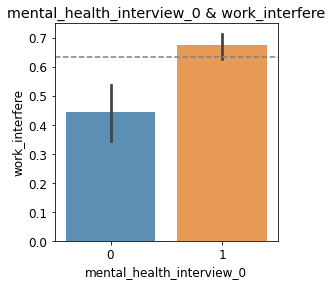


_____________________



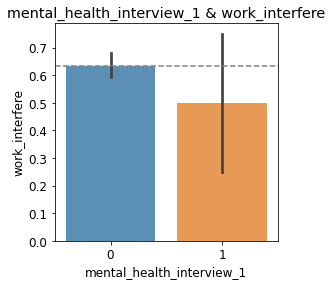


_____________________



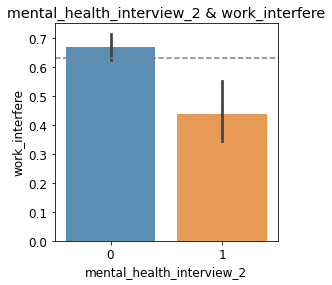


_____________________



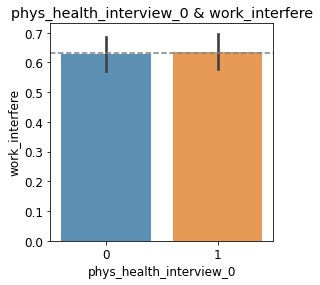


_____________________



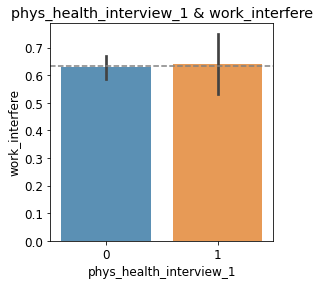


_____________________



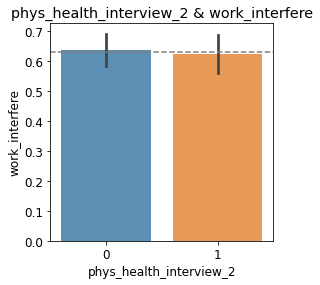


_____________________



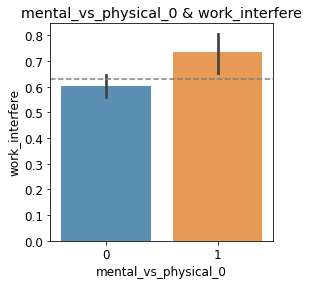


_____________________



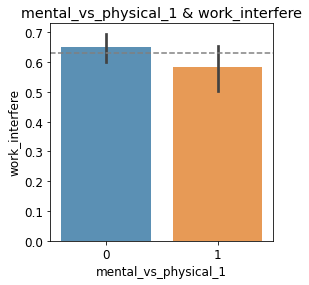


_____________________



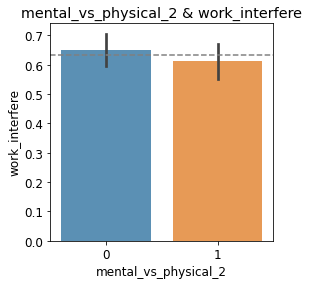


_____________________

age


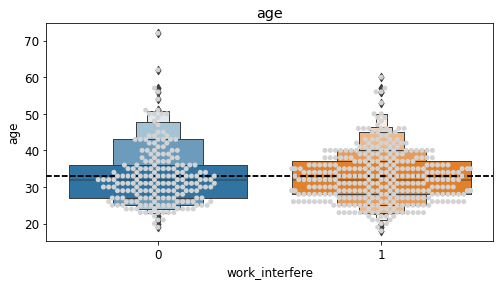

                count       mean       std   min   25%   50%   75%   max
work_interfere                                                          
0               197.0  33.025381  8.191233  19.0  27.0  32.0  36.0  72.0
1               338.0  32.801775  7.049574  18.0  28.0  32.0  37.0  60.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=32599.5, pvalue=0.6874668645912754)

____________________

                       variable    chi2  p-value  degrees of freedom
0                work_interfere  530.71   0.0000                 1.0
1     mental_health_interview_0   17.35   0.0000                 1.0
2     mental_health_interview_2   15.99   0.0001                 1.0
3                care_options_1   14.97   0.0001                 1.0
4                  supervisor_1   12.42   0.0004                 1.0
5                    benefits_2   12.19   0.0005                 1.0
6   mental_health_consequence_1   11.28   0.0008                 1.0
7                        gender   13.21   0.0

In [35]:
hot_bi_metrics = explore.mental_health_bivariate(hot_train, 'work_interfere')

#### multivariate

In [36]:
# explore.explore_multivariate(train, 'work_interfere')

In [46]:
target = 'work_interfere'

explore.explore_multivariate(train, target, cat_vars, quant_vars)

AttributeError: module 'explore' has no attribute 'explore_multivariate'

In [37]:
# multivariate - key findings, takeaways and next steps:

In [38]:
# Hypothesis testing

#### one hot encoding

In [39]:
# def encoding(df, cols, drop_first=True):
#     '''
#     Take in df and list of columns
#     add encoded columns derived from columns in list to the df
#     '''
#     for col in cols:

#         dummies = pd.get_dummies(df['mental-health_consequence', 'phys-health_consequence', 'mental_health_interview', 'phys_health_interview'], drop_first=drop_first) # get dummy columns

#         df = pd.concat([df, dummies], axis=1) # add dummy columns to df
        
#     return df

In [40]:
df.head(3)

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN


In [41]:
# make new dataframe for one hot encoding mental_health_consequence, phys_health_consequence, mental_health_interview, phys_health_interview
lupe_df = encoded_df.copy()

In [42]:
lupe_df.head(3)

,timestamp,age,gender,country,self_employed,family_history,treatment,work_interfere,company_size,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,1,United States,0,0,1,1,1,0,...,1,3,0,0,2,1,0,2,1,0
1,2014-08-27 11:29:37,44,0,United States,0,0,0,1,5,0,...,2,2,2,0,0,0,0,0,2,0
2,2014-08-27 11:29:44,32,0,Canada,0,0,0,1,1,0,...,2,1,0,0,1,1,1,1,0,0


In [43]:
# one hot code
lupe_new_df = pd.get_dummies(
    data = lupe_df, columns = 
    ['mental_health_consequence',
     'phys_health_consequence', 
     'mental_health_interview', 
     'phys_health_interview'], 
    drop_first=True
)

In [44]:
lupe_new_df.head(3)

,timestamp,age,gender,country,self_employed,family_history,treatment,work_interfere,company_size,remote_work,...,mental_vs_physical,obs_consequence,mental_health_consequence_1,mental_health_consequence_2,phys_health_consequence_1,phys_health_consequence_2,mental_health_interview_1,mental_health_interview_2,phys_health_interview_1,phys_health_interview_2
0,2014-08-27 11:29:31,37,1,United States,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,1
1,2014-08-27 11:29:37,44,0,United States,0,0,0,1,5,0,...,2,0,0,1,0,0,0,0,0,0
2,2014-08-27 11:29:44,32,0,Canada,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0


In [45]:
lupe_new_df.columns.to_list()

['timestamp',
 'age',
 'gender',
 'country',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'company_size',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'coworkers',
 'supervisor',
 'mental_vs_physical',
 'obs_consequence',
 'mental_health_consequence_1',
 'mental_health_consequence_2',
 'phys_health_consequence_1',
 'phys_health_consequence_2',
 'mental_health_interview_1',
 'mental_health_interview_2',
 'phys_health_interview_1',
 'phys_health_interview_2']